In [1]:
#import h5py
#import galaxychop as gchop
#import uttr
#import attr
import seaborn as sns
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.offsetbox import AnchoredText
import numpy as np
import pickle

# Leo las galaxias

In [2]:
df_gal01 = pd.read_pickle('../../datos_gchop_paper/pickle_agama/df_gal01.pkl')
df_gal02 = pd.read_pickle('../../datos_gchop_paper/pickle_agama/df_gal02.pkl')
df_gal03 = pd.read_pickle('../../datos_gchop_paper/pickle_agama/df_gal03.pkl')
df_gal04 = pd.read_pickle('../../datos_gchop_paper/pickle_agama/df_gal04.pkl')
df_gal05 = pd.read_pickle('../../datos_gchop_paper/pickle_agama/df_gal05.pkl')
df_gal06 = pd.read_pickle('../../datos_gchop_paper/pickle_agama/df_gal06.pkl')
df_gal07 = pd.read_pickle('../../datos_gchop_paper/pickle_agama/df_gal07.pkl')
df_gal08 = pd.read_pickle('../../datos_gchop_paper/pickle_agama/df_gal08.pkl')
df_gal09 = pd.read_pickle('../../datos_gchop_paper/pickle_agama/df_gal09.pkl')

m1=df_gal01.m.sum()
m2=df_gal02.m.sum()
m3=df_gal03.m.sum()
m4=df_gal04.m.sum()
m5=df_gal05.m.sum()
m6=df_gal06.m.sum()
m7=df_gal07.m.sum()
m8=df_gal08.m.sum()
m9=df_gal09.m.sum()

In [3]:
print(len(df_gal01))

6250


In [4]:
df_gal01.head(3)
df_gal01.keys()

Index(['m', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'label_JThreshold',
       'label_JHistogram', 'label_JEHistogram', 'label_KMeans',
       'label_GaussianMixture', 'probs0_GaussianMixture',
       'probs1_GaussianMixture', 'label_AutoGaussianMixture',
       'probs0_AutoGaussianMixture', 'probs1_AutoGaussianMixture',
       'probs2_AutoGaussianMixture', 'probs3_AutoGaussianMixture',
       'label_Agama'],
      dtype='object')

In [5]:
df_gal01.label_JHistogram.isna().sum()

87

In [6]:
dfs01 = df_gal01[df_gal01['label_JThreshold'].notna()]
print(len(dfs01.label_JThreshold))
print(dfs01.label_JHistogram)

6163
0       1.0
1       0.0
2       1.0
3       1.0
4       1.0
       ... 
6245    0.0
6246    0.0
6247    0.0
6248    0.0
6249    0.0
Name: label_JHistogram, Length: 6163, dtype: float64


## uso solo los labels no NaN

In [7]:
dfs01 = df_gal01[df_gal01['label_JThreshold'].notna()]
dfs02 = df_gal02[df_gal02['label_JThreshold'].notna()]
dfs03 = df_gal03[df_gal03['label_JThreshold'].notna()]
dfs04 = df_gal04[df_gal04['label_JThreshold'].notna()]
dfs05 = df_gal05[df_gal05['label_JThreshold'].notna()]
dfs06 = df_gal06[df_gal06['label_JThreshold'].notna()]
dfs07 = df_gal07[df_gal07['label_JThreshold'].notna()]
dfs08 = df_gal08[df_gal08['label_JThreshold'].notna()]
dfs09 = df_gal09[df_gal09['label_JThreshold'].notna()]

# Analisis Confusion Matrix (% Particulas)

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

## AGAMA vs Threshold

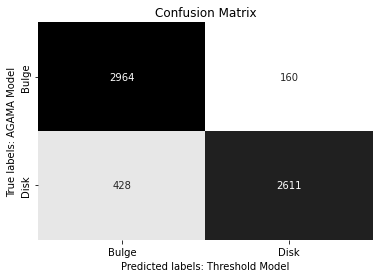

In [9]:
#sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
y_true=dfs01.label_Agama
y_pred=dfs01.label_JThreshold   
cm = confusion_matrix(y_true, y_pred)
cm_per = cm*100/len(y_true)

ax= plt.subplot()
sns.heatmap(cm,annot=True, cmap='binary', fmt='g', cbar=False, ax=ax)

#sns.heatmap(cm_per,annot=True, cmap='binary', fmt='.1f', ax=ax)
#for t in ax.texts: t.set_text(t.get_text() + " %")

ax.set_ylabel('True labels: AGAMA Model');ax.set_xlabel('Predicted labels: Threshold Model'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Bulge', 'Disk']); ax.yaxis.set_ticklabels(['Bulge', 'Disk']);

In [10]:
y_true=dfs01.label_Agama

In [11]:
print('Negative', len(dfs01.label_Agama[dfs01.label_Agama==0]))
print('Positive', len(dfs01.label_Agama[dfs01.label_Agama==1]))

Negative 3124
Positive 3039



 
|              |Predicted  |                       |
|--------------|-----------|-----------------------|
|Tot = P+N     | Predicted Positive      | Predicted Negative  |
|--------------|-----------|-----------------------|
| Positive (Ptot)    | True Positive (TP)      | False Negative (FN)  |
| Negative  (Ntot)   | False Positive (FP)     | True Negative (TN)   |
|--------------|-----------|-----------------------|


### Precision (Positive Predictive Value PPV)
PPV = TP / (TP + FP) 

The precision is intuitively the ability of the classifier not to label a negative sample as positive.

In [12]:
precision_score(y_true, y_pred)

0.9422591122338506

### Recall (True Positive Rate TPR)
TPR = TP / Ptot = TP / (TP + FN)

The recall is intuitively the ability of the classifier to find all the positive samples.

In [13]:
recall_score(y_true, y_pred)

0.8591641987495887

In [14]:
print(dfs04.label_KMeans[0])
print(dfs04.label_KMeans[35145])
ss=np.abs(dfs04.label_KMeans-1)
print(ss[0])
print(ss[35145])

0.0
1.0
1.0
0.0


# Tabla Precision

In [33]:
df = pd.DataFrame(columns=['JHistogram', 'JThreshold', 'JEHistogram', 'KMeans'],
             index=['Agama01', 'Agama02', 'Agama03', 'Agama04','Agama05', 'Agama06',
                    'Agama07', 'Agama08', 'Agama09'])

df0 = pd.DataFrame(columns=['JHistogram', 'JThreshold', 'JEHistogram', 'KMeans'],
             index=['Agama01', 'Agama02', 'Agama03', 'Agama04','Agama05', 'Agama06',
                    'Agama07', 'Agama08', 'Agama09'])
#------------------------------------------
def precision(y_true,y_pred):
    cm = confusion_matrix(y_true, y_pred)        
    prec = precision_score(y_true, y_pred)
    return prec

def prec0(y_true,y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel() 
    
    prec_lab0=tn/(fn+tn)
    return prec_lab0
#------------------------------------------

gal = [dfs01,dfs02,dfs03,dfs04,dfs05,dfs06,dfs07,dfs08,dfs09]
model = ['label_JHistogram','label_JThreshold','label_JEHistogram','label_KMeans']


for idg,g in enumerate(gal):
    for idm, m in enumerate(model):
        
        y_true=g['label_Agama']
        #y_pred=dfs01[m]
        y_pred=g[m]
        if(idg==3 or idg==4 or idg==5):
            if(idm==3):
                #df--> prec0-----------------------
                print('label cambiado',idg,idm, m)
                y_pred=np.abs(g[m]-1)
 
        df.iloc[idg,idm] = precision(y_true, y_pred)
        df0.iloc[idg,idm] = prec0(y_true, y_pred)
        #print('label bien',idg,idm, m)
        #print(precision(y_true, y_pred),prec0(y_true, y_pred))
        
pd.options.display.float_format = '{:,.3f}'.format

df_prec_bulge = df
df_prec_disk = df0

label cambiado 3 3 label_KMeans
label cambiado 4 3 label_KMeans
label cambiado 5 3 label_KMeans


In [34]:
df_prec_bulge

,JHistogram,JThreshold,JEHistogram,KMeans
Agama01,0.865,0.942,0.862,0.864
Agama02,0.843,0.933,0.838,0.789
Agama03,0.910,0.925,0.925,0.855
Agama04,0.890,0.908,0.914,0.770
Agama05,0.905,0.895,0.918,0.731
Agama06,0.906,0.885,0.883,0.648
Agama07,0.723,0.825,0.841,0.461
Agama08,0.773,0.788,0.825,0.369
Agama09,0.752,0.703,0.836,0.002


# Tabla ReCall

In [17]:
df = pd.DataFrame(columns=['JHistogram', 'JThreshold', 'JEHistogram', 'KMeans'],
             index=['Agama01', 'Agama02', 'Agama03', 'Agama04','Agama05', 'Agama06',
                    'Agama07', 'Agama08', 'Agama09'])
df0 = pd.DataFrame(columns=['JHistogram', 'JThreshold', 'JEHistogram', 'KMeans'],
             index=['Agama01', 'Agama02', 'Agama03', 'Agama04','Agama05', 'Agama06',
                    'Agama07', 'Agama08', 'Agama09'])
#------------------------------------------
#def recall(y_true,y_pred):
#    cm = confusion_matrix(y_true, y_pred)        
#    rec = recall_score(y_true, y_pred)
#    return rec

#def rec0(y_true,y_pred):
#    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel() 
#    
#    rec_lab0=tn/(fp+tn)
#    return rec_lab0

# Completitud Modificada
def rec1(y_true,y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()        
    rec = (tp + fp)/(tp + fn)
    return rec

def rec0(y_true,y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel() 
    
    rec_lab0 = (tn + fn)/(fp+tn)
    return rec_lab0

#------------------------------------------

gal = [dfs01,dfs02,dfs03,dfs04,dfs05,dfs06,dfs07,dfs08,dfs09]
model = ['label_JHistogram','label_JThreshold','label_JEHistogram','label_KMeans']


for idg,g in enumerate(gal):
    for idm, m in enumerate(model):
        
        y_true=g['label_Agama']
        #y_pred=dfs01[m]
        y_pred=g[m]
        if(idg==3 or idg==4 or idg==5):
            if(idm==3):
                #df--> prec0-----------------------
                print('label cambiado',idg,idm, m)
                y_pred=np.abs(g[m]-1)
        
        #df.iloc[idg,idm] = recall(y_true, y_pred) #bulge
        df.iloc[idg,idm] = rec1(y_true, y_pred) #bulge
        df0.iloc[idg,idm] = rec0(y_true, y_pred) #disk
        #print(idg,idm, m)

        

pd.options.display.float_format = '{:,.3f}'.format

df_rec_bulge = df
df_rec_disk = df0

label cambiado 3 3 label_KMeans
label cambiado 4 3 label_KMeans
label cambiado 5 3 label_KMeans


      JHistogram JThreshold JEHistogram KMeans
Agama      0.865      0.942       0.862  0.864
Agama      0.843      0.933       0.838  0.789
Agama      0.910      0.925       0.925  0.855
Agama      0.890      0.908       0.914  0.770
Agama      0.905      0.895       0.918  0.731
Agama      0.906      0.885       0.883  0.648
Agama      0.723      0.825       0.841  0.461
Agama      0.773      0.788       0.825  0.369
Agama      0.752      0.703       0.836  0.002


Text(0.5, 1.0, 'Precision')

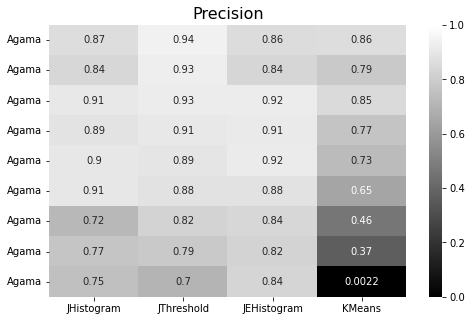

In [18]:
print(df_prec_bulge)
df_prec_bulge= df_prec_bulge[df_rec_bulge.columns].astype(float)
plt.figure(figsize=(8,5))
sns.heatmap(df_prec_bulge, annot=True, vmin=0, vmax=1, center=0.5, cmap='gray')
plt.title('Precision', fontsize=16)
#plt.savefig('gchop_plots/heatmap_precision.png', dpi=200)

        JHistogram JThreshold JEHistogram KMeans
Agama01      1.004      0.912       1.026  1.090
Agama02      0.981      0.876       1.006  1.181
Agama03      1.022      1.053       1.056  1.159
Agama04      1.017      1.054       1.045  1.279
Agama05      1.020      1.094       1.055  1.359
Agama06      1.008      1.095       1.043  1.525
Agama07      0.983      0.941       1.040  2.078
Agama08      0.985      1.101       1.043  2.654
Agama09      0.995      1.262       1.066  5.924


Text(0.5, 1.0, 'Recall')

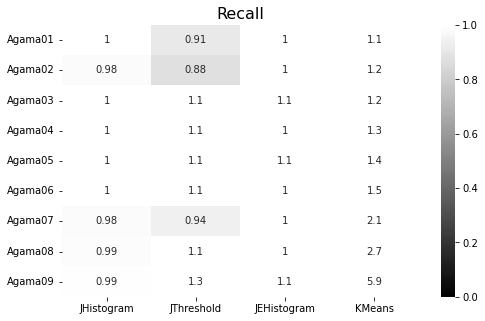

In [19]:
print(df_rec_bulge)
df_rec_bulge= df_rec_bulge[df_rec_bulge.columns].astype(float)

plt.figure(figsize=(8,5))
sns.heatmap(df_rec_bulge, annot=True, vmin=0, vmax=1, center=0.5, cmap='gray')
plt.title('Recall', fontsize=16)

#plt.savefig('gchop_plots/heatmap_recall.png', dpi=200)

In [35]:
df_rec_bulge

,JHistogram,JThreshold,JEHistogram,KMeans
Agama01,1.004,0.912,1.026,1.090
Agama02,0.981,0.876,1.006,1.181
Agama03,1.022,1.053,1.056,1.159
Agama04,1.017,1.054,1.045,1.279
Agama05,1.020,1.094,1.055,1.359
Agama06,1.008,1.095,1.043,1.525
Agama07,0.983,0.941,1.040,2.078
Agama08,0.985,1.101,1.043,2.654
Agama09,0.995,1.262,1.066,5.924


# Plots

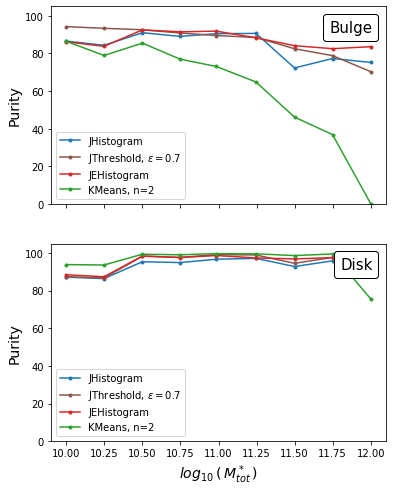

In [49]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True,figsize=(6,8))

gal = np.array([1,2,3,4,5,6,7,8,9])
gal = np.log10(np.array([m1,m2,m3,m4,m5,m6,m7,m8,m9]))

JH = df_prec_bulge.iloc[:,0]*100.
JT = df_prec_bulge.iloc[:,1]*100.
JE = df_prec_bulge.iloc[:,2]*100.
KM = df_prec_bulge.iloc[:,3]*100.

ax1.plot(gal,JH,'.-',label='JHistogram', color='C0')
ax1.plot(gal,JT,'.-',label='JThreshold, $\epsilon=0.7$', color='C5')
ax1.plot(gal,JE,'.-',label='JEHistogram', color='C3')
ax1.plot(gal,KM,'.-',label='KMeans, n=2', color='C2')
ax1.set_ylim(0.0,105)
ax1.set_ylabel('Purity', fontsize=14)
ax2.set_xlabel(r'$log_{10}\,(\,M^*_{tot}\,)$', fontsize=14)
ax1.legend()

at = AnchoredText("Bulge", prop=dict(size=15), frameon=True, loc='upper right')
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax1.add_artist(at)

#--------------------------------
JH = df_prec_disk.iloc[:,0]*100.
JT = df_prec_disk.iloc[:,1]*100.
JE = df_prec_disk.iloc[:,2]*100.
KM = df_prec_disk.iloc[:,3]*100.
#C1:AGMM; C4:GMM
ax2.plot(gal,JH,'.-',label='JHistogram', color='C0')
ax2.plot(gal,JT,'.-',label='JThreshold, $\epsilon=0.7$', color='C5')
ax2.plot(gal,JE,'.-',label='JEHistogram', color='C3')
ax2.plot(gal,KM,'.-',label='KMeans, n=2', color='C2')
ax2.set_ylim(0.0,105)
ax2.set_ylabel('Purity', fontsize=14)
ax2.set_xlabel(r'$log_{10}\,(\,M^*_{tot}\,)$', fontsize=14)
ax2.legend()

at = AnchoredText("Disk", prop=dict(size=15), frameon=True, loc='upper right')
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax2.add_artist(at)

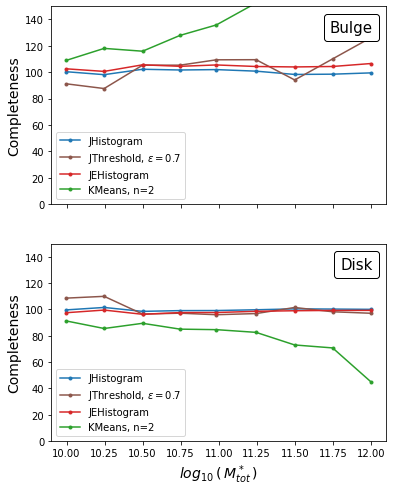

In [53]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True,figsize=(6,8))

gal = np.array([1,2,3,4,5,6,7,8,9])
gal = np.log10(np.array([m1,m2,m3,m4,m5,m6,m7,m8,m9]))


JH = df_rec_bulge.iloc[:,0]*100.
JT = df_rec_bulge.iloc[:,1]*100.
JE = df_rec_bulge.iloc[:,2]*100.
KM = df_rec_bulge.iloc[:,3]*100.

ax1.plot(gal,JH,'.-',label='JHistogram', color='C0')
ax1.plot(gal,JT,'.-',label='JThreshold, $\epsilon=0.7$', color='C5')
ax1.plot(gal,JE,'.-',label='JEHistogram', color='C3')
ax1.plot(gal,KM,'.-',label='KMeans, n=2', color='C2')
ax1.set_ylim(0.0,150)
ax1.set_ylabel('Completeness', fontsize=14)
ax1.legend()

at = AnchoredText("Bulge", prop=dict(size=15), frameon=True, loc='upper right')
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax1.add_artist(at)


#--------------------------------
JH = df_rec_disk.iloc[:,0]*100.
JT = df_rec_disk.iloc[:,1]*100.
JE = df_rec_disk.iloc[:,2]*100.
KM = df_rec_disk.iloc[:,3]*100.

ax2.plot(gal,JH,'.-',label='JHistogram', color='C0')
ax2.plot(gal,JT,'.-',label='JThreshold, $\epsilon=0.7$', color='C5')
ax2.plot(gal,JE,'.-',label='JEHistogram', color='C3')
ax2.plot(gal,KM,'.-',label='KMeans, n=2', color='C2')
ax2.set_ylim(0.0,150)
ax2.set_xlabel(r'$log_{10}\,(\,M^*_{tot}\,)$', fontsize=14)
ax2.set_ylabel('Completeness', fontsize=14)
ax2.legend()

at = AnchoredText("Disk", prop=dict(size=15), frameon=True, loc='upper right')
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax2.add_artist(at)